In [1]:
using LinearAlgebra
using Plots
#using PyCall
#@pyimport pickle
#@pyimport numpy as np
#using ScikitLearn
#@sk_import datasets: fetch_openml

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [2]:
function numerical_diff(f,x; h=1e-4)
    return 0.5(f(x+h)-f(x-h))/h
end

numerical_diff (generic function with 1 method)

In [3]:
function f_1(x)
    return map(a->0.01*a^2 + 0.1*a,x)
end

f_1 (generic function with 1 method)

In [4]:
print(numerical_diff(f_1,5)," ",numerical_diff(f_1,10))

0.1999999999990898 0.2999999999986347

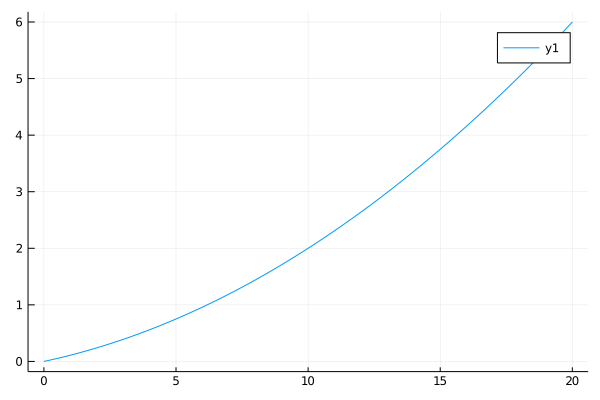

In [5]:
x = range(0.0,length=201,step=0.1)
y = f_1(x)
plot(x,y)

In [10]:
# f(x_1, x_2) = x₁^2 + x₂^2
function f_2(x1,x2)
    return x1^2 + x2^2 # x[1]^2 + x[2]^2
end

f_2 (generic function with 2 methods)

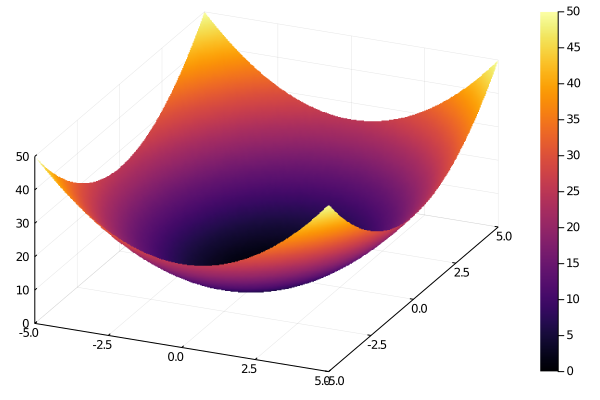

In [11]:
x1 = range(-5,length=101,step=0.1)
y1 = range(-5,length=101,step=0.1)
plot(x1,y1,f_2,st=:surface,camera=(30,60))

In [12]:
function multi_append(b,N)   # 편향 b를 붙이기 위해
    bt=transpose(b)
    bb=bt
    for i in 1:N-1
        bb=[bb;bt]
    end
    return bb
end

multi_append (generic function with 1 method)

In [84]:
function numerical_grad(f,x)
    xax=size(x[1,:])[1]
    yax=size(x[:,1])[1]
    println(size(xax),size(yax))
    h = multi_append(1e-4,size(x[:,1])[1])
    grad = zeros(xax,yax)
    println(size(grad))
    for i in 1:size(x[1,:])[1]
        tmp_val=x[i,:]
        # f(x+h)
        print(size(tmp_val),size(h))
        x[i] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[i] = tmp_val - h
        fxh2 = f(x)
        
        grad[i] = 0.5(fxh1-fxh2)/h
        x[i]=tmp_val      # 값 복원
    end
    return grad
end

numerical_grad (generic function with 2 methods)

In [ ]:
x=[x1 y1]

In [85]:
numerical_grad(f_2,[3.0,4.0])

()()
(1, 2)
(1,)(2,)

DimensionMismatch: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(1),), b has dims (Base.OneTo(2),), mismatch at 1")

In [73]:
size(x[:,1])[1]

101